In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import denaturationpy as dp

from plotnine import *

In [2]:
system = dp.System(298.3)
fgf2_concentration = dp.FGF2Concentration('fgf2', system,
    agg_Ea=101900000, agg_Tf=393.1, misfold_prob=0.9)
fgf2_concentration.set_initial(1,0,0)
urea_concentration = dp.FixedConcentration('urea', 0)
gdmcl_concentration = dp.FixedConcentration('GdmCl', 0)
fgf2_concentration.add_denaturant(urea_concentration, -8745)
fgf2_concentration.add_denaturant(gdmcl_concentration, -18100)
fgf2_concentration.kf2_enthalpy = 34000
system.add_concentration(fgf2_concentration)
system.add_concentration(urea_concentration)
system.add_concentration(gdmcl_concentration)

In [3]:
def enrich(data):
    data['U_eq'] = data['k_u']/(data['k_f']+data['k_u'])
    data['M_eq'] = data['nu']*data['k_u']*data['k_f']/((data['k_u']+data['k_f2'])*(data['k_u']+data['k_f']))
    data['N_eq'] = data['k_f']/(data['k_f']+data['k_u']) - data['M_eq']

In [4]:
data = pd.DataFrame(columns=['temperature', 'gdmcl', 'k_f', 'k_u', 'k_f2', 'nu'])
temperatures = list(range(30, 41, 1))
gdmcls = np.linspace(0, 2, 1000)
for temp in temperatures:
    for gdmcl in gdmcls:
        system.temperature = 273.3 + temp
        gdmcl_concentration.c0 = gdmcl
        data = data.append(
            {'temperature': temp, 'gdmcl': gdmcl, 'nu': fgf2_concentration.misfold_prob,
            'k_f2': np.exp(fgf2_concentration.ln_kf2(0, system.y0())),
            'k_f': np.exp(fgf2_concentration.ln_kf(0,system.y0())),
            'k_u': np.exp(fgf2_concentration.ln_ku(0, system.y0()))},
            ignore_index=True)

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Equilibrium Denaturants.png


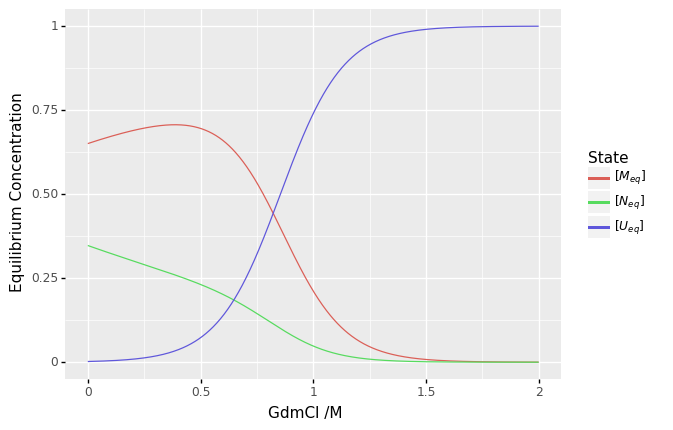

<ggplot: (8777598245738)>

In [8]:
enrich(data)
tmp = data.query('temperature==30')
tmp = tmp[['gdmcl', 'N_eq', 'M_eq', 'U_eq']].melt('gdmcl')
p = (
    ggplot(tmp, aes(x='gdmcl', y='value', colour='variable', group='variable')) +
    geom_line() + labs(colour='State') +
    scale_colour_hue(labels=(r'$[M_{eq}]$', r'$[N_{eq}]$', r'$[U_{eq}]$')) +
    ylab('Equilibrium Concentration') + xlab('GdmCl /M')
)
p.save('Paper Figures/Equilibrium Denaturants.png')
p

In [9]:
data[data.temperature == 30]

,temperature,gdmcl,k_f,k_u,k_f2,nu,U_eq,M_eq,N_eq
0,30.0,0.000000,0.381372,0.000829,0.000315,0.9,0.002168,6.505597e-01,3.472725e-01
1,30.0,0.002002,0.376905,0.000831,0.000315,0.9,0.002199,6.510028e-01,3.467982e-01
2,30.0,0.004004,0.372490,0.000833,0.000315,0.9,0.002231,6.514449e-01,3.463242e-01
3,30.0,0.006006,0.368127,0.000835,0.000315,0.9,0.002263,6.518862e-01,3.458507e-01
4,30.0,0.008008,0.363815,0.000837,0.000315,0.9,0.002296,6.523266e-01,3.453776e-01
...,...,...,...,...,...,...,...,...,...
10995,40.0,1.991992,0.000007,6.994372,0.000501,0.9,0.999999,8.721412e-07,9.697394e-08
10996,40.0,1.993994,0.000007,7.011908,0.000501,0.9,0.999999,8.600933e-07,9.563416e-08
10997,40.0,1.995996,0.000007,7.029487,0.000501,0.9,0.999999,8.482118e-07,9.431288e-08
10998,40.0,1.997998,0.000007,7.047110,0.000501,0.9,0.999999,8.364944e-07,9.300986e-08
